In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df=pd.read_csv('IRIS.csv')
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

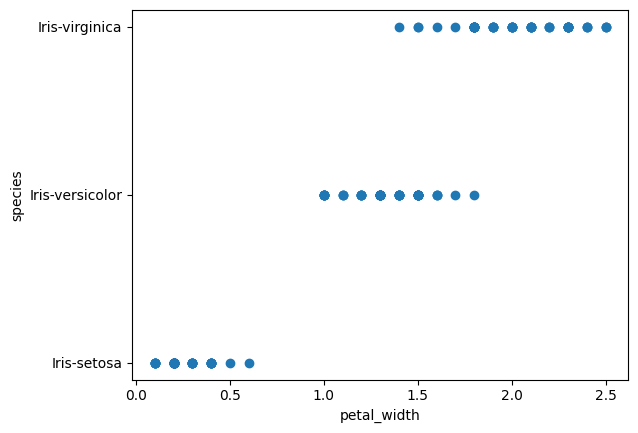

In [4]:
plt.scatter(df['petal_width'], df['species'])
plt.xlabel("petal_width")
plt.ylabel("species")
plt.show()

In [7]:
# panda dataframes are created for feature matrix and output column
X=df.iloc[:,0:4]
y=df.iloc[:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [13]:
# this pandas function is speciallly used for one hot encoding a pandas dataframe or some of its columns
y=pd.get_dummies(y)
y


,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


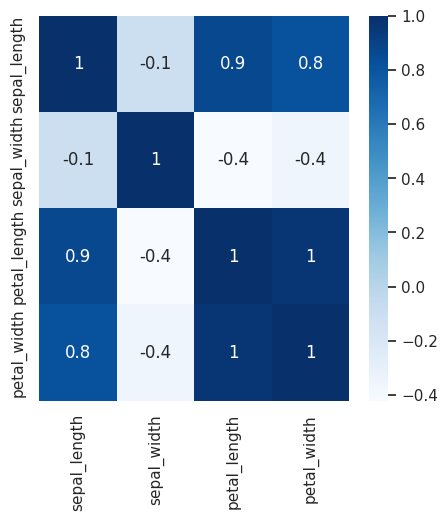

In [15]:
import seaborn as sns
# folloing line only tells the dimension of the plot 5 by 5 inches
plt.figure(figsize=(5,5))

sns.set_theme(style="white")
# we set numeric only=true to explicitily state that calculate corr only for the numeric values.
# currently it is by default true but in future it will be default false
corr = df.corr(numeric_only=True)


heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print(X_train)

     sepal_length  sepal_width  petal_length  petal_width
91            6.1          3.0           4.6          1.4
135           7.7          3.0           6.1          2.3
69            5.6          2.5           3.9          1.1
128           6.4          2.8           5.6          2.1
114           5.8          2.8           5.1          2.4
..            ...          ...           ...          ...
133           6.3          2.8           5.1          1.5
137           6.4          3.1           5.5          1.8
72            6.3          2.5           4.9          1.5
140           6.7          3.1           5.6          2.4
37            4.9          3.1           1.5          0.1

[120 rows x 4 columns]


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
lr_model = LogisticRegression()
# Perform 5-fold cross-validation on the entire dataset
cv_scores = cross_val_score(lr_model, X_train, Y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
# Calculate the mean and standard deviation of the scores
print("Mean accuracy: ", cv_scores.mean())
print("Standard deviation: ", cv_scores.std())


Cross-validation scores: [0.95833333 0.95833333 1.         0.95833333 0.95833333]
Mean accuracy:  0.9666666666666668
Standard deviation:  0.016666666666666653


In [12]:
lr_model.fit(X_train, Y_train)
print("Training set score: {:.3f}".format(lr_model.score(X_train, Y_train)))
print("Test set score: {:.3f}".format(lr_model.score(X_test, Y_test)))

Training set score: 0.983
Test set score: 0.967
